## Ejercicio 3

## Teoría
**Defina y responda:**

### 1. Escenario de ciudad
- **a. Modelo temporal:** Tiempo continuo (infecciones impulsadas por eventos)
- **b. Distribución de rasgos:**
    - 20% de personas mayores (alto riesgo)
    - 30% de trabajadores esenciales (alta movilidad)
- **c. Respuestas:**
    1. **¿Cómo podría la interacción del modelo temporal y la distribución de rasgos amplificar los brotes en residencias de ancianos?**
        - El modelo temporal continuo lo que permite es el capturar con mayor precisión los momentos exactos en que ocurren los contactos y las infecciones. El caso de alto riesgo, es si las personas mayores residen en entornos donde los trabajadores esenciales (alta movilidad) interactúan frecuentemente con ellos , los eventos de infección pueden agruparse en intervalos cortos amplificando los brotes en estos lugares. Donde la combinación de alta movilidad y alta vulnerabilidad puede generar picos rápidos y localizados de contagio en residencias de ancianos.
    2. **¿Podría el modelado de tiempo discreto ocultar esta dinámica? ¿Por qué?**
        - Consideramos que si, ya que el modelado de tiempo discreto puede ocultar esta dinámica porque agrupa los eventos en intervalos fijos como lo puede ser días. Esto puede hacer que múltiples infecciones que ocurren en un corto periodo se contabilicen como si ocurrieran simultáneamente, perdiendo la resolución temporal fina y dificultando la identificación de cadenas rápidas de transmisión en grupos vulnerables.

### 2. Curvas de infección simuladas con picos en barrios de bajos ingresos
- **a. Identifique dos objetivos de calibración para validar:**
    1. **Tiempo de eventos:** Validar que los intervalos entre infecciones simuladas coincidan con los observados en datos reales.
    2. **Resultados dependientes de rasgos:** Comparar tasas de casos por nivel de ingresos para asegurar que la simulación reproduce las desigualdades observadas.
- **b. ¿Cómo distinguiría entre artefactos del modelo y desigualdades reales?**
    - Para distinguir entre artefactos del modelo y desigualdades reales se deben comparar los resultados simulados con datos empíricos y realizar análisis de sensibilidad. En donde si los picos o desigualdades desaparecen o cambian significativamente al modificar supuestos del modelo es probable que sean artefactos. Si persisten bajo diferentes configuraciones y coinciden con patrones observados en la realidad es más probable que reflejen desigualdades reales. En el caso de la gráfica ayuda a identificar patrones anómalos o consistentes con la literatura y los datos reales.

## Ejercicio práctico

**Usando lo propuesto de la parte práctica de los ejercicios 1 y 2, realice la propuesta de diseño de la vacunación en una ciudad diversa con:**

- **Grupos prioritarios:**
    - Personas mayores de 65 años
    - Personal sanitario
    - Docentes
- **Barreras de acceso:**
    - Distancia a las clínicas
    - Reticencia a la vacunación
- **Combinación de tiempo y heterogeneidad**

### Actividades a realizar:

1. **Diseñe reglas de prioridad para la cola de eventos:**
    - Ejemplo de regla:
        ```python
        if agente.edad > 65:
            schedule_vaccine(priority=1)
        elif agente.ocupacion == 'sanitario':
            schedule_vaccine(priority=2)
        elif agente.ocupacion == 'docente':
            schedule_vaccine(priority=3)
        else:
            schedule_vaccine(priority=4)
        ```
    - **¿Cómo gestionaría los conflictos?**
        - Si un agente pertenece a varios grupos prioritarios (por ejemplo, un docente mayor), se le asigna la prioridad más alta (menor valor numérico). Alternativamente, se puede definir una función de prioridad compuesta que sume puntos por cada criterio cumplido, o usar reglas de desempate basadas en riesgo o sorteo.

2. **Defina 3 subpoblaciones con:**
    - Rasgos continuos: Puntuación de riesgo (0-10), calculada a partir de edad, comorbilidades, exposición laboral, etc.
    - Rasgos discretos: Nivel de acceso (1=alto, 2=medio, 3=bajo), según distancia a clínicas, disponibilidad de transporte, etc.
    - **Método de muestreo para grupos minoritarios:**
        - Utilizar muestreo estratificado: dividir la población en estratos según nivel de acceso y riesgo, y muestrear proporcionalmente o sobre-muestrear a los grupos minoritarios para asegurar su representación en la simulación. Por ejemplo, si solo el 10% tiene acceso bajo, hacer que se asegure que al menos el 20% de la muestra pertenezca a este grupo para analizar desigualdades.

3. **Diseñe un sistema de registro para rastrear:**
    - Secuencia de eventos: registrar para cada evento la marca de tiempo, ID del agente, estado de la vacuna (sin dosis, 1ra dosis, 2da dosis, refuerzo).
    - Asignación de dosis por subpoblación: llevar un conteo acumulado de dosis aplicadas por grupo de riesgo y nivel de acceso.
    - **Visualización recomendada:**
        - Mapas de calor para mostrar la distribución geográfica de la vacunación y detectar zonas con baja cobertura. También curvas de Lorenz para visualizar la desigualdad en el acceso a la vacunación entre subpoblaciones. Además gráficas de barras o líneas en donde se compare la velocidad de vacunación entre grupos prioritarios.

4. **Adicionalmente:**
    - ¿Cómo las interacciones rasgo-tiempo podrían sesgar las recomendaciones de políticas?
        - Si ciertos grupos como las personas con bajo acceso o alta reticencia reciben la vacuna más tarde o en menor proporción en donde los resultados de la simulación pueden subestimar la vulnerabilidad real de estos grupos. Esto puede llevar a recomendaciones de políticas que no prioricen adecuadamente a quienes más lo necesitan sabiendo ya los afectados. Además, si la simulación no ajusta correctamente los tiempos de espera o la logística para grupos minoritarios, se corre el riesgo de perpetuar desigualdades en la toma de decisiones.

---

### Pseudocódigo

```python
# Inicializar cola de eventos de vacunación
cola_eventos = PriorityQueue()

for agente in poblacion:
    # Calcular prioridad según reglas
    if agente.edad > 65:
        prioridad = 1
    elif agente.ocupacion == 'sanitario':
        prioridad = 2
    elif agente.ocupacion == 'docente':
        prioridad = 3
    else:
        prioridad = 4
    # Añadir evento de vacunación a la cola
    cola_eventos.put((prioridad, agente.id))

# Procesar eventos de vacunación
while not cola_eventos.empty():
    prioridad, agente_id = cola_eventos.get()
    agente = buscar_agente_por_id(agente_id)
    if agente.estado_vacuna == 'sin dosis':
        aplicar_vacuna(agente)
        registrar_evento(tiempo_actual, agente.id, agente.estado_vacuna)
        actualizar_conteo_subpoblacion(agente)

# Visualización de resultados
graficar_mapa_calor(vacunacion_por_zona)
graficar_curva_lorenz(acceso_vacunas)
```

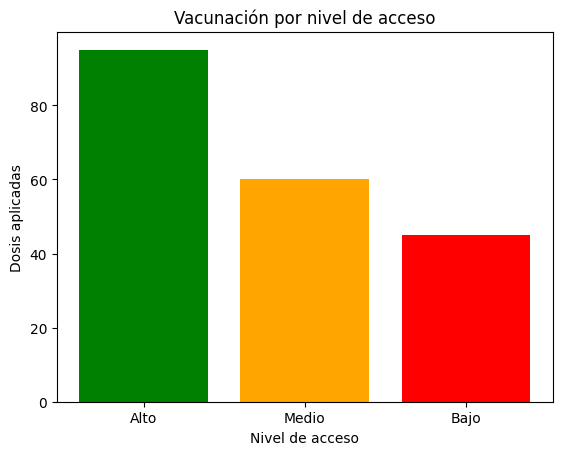

In [ ]:
# simulación de sistema de vacunación prioritario en una ciudad diversa
from dataclasses import dataclass, field
import random
import heapq
import matplotlib.pyplot as plt

# Definición del agente
@dataclass(order=True)
class Agente:
    sort_index: int = field(init=False, repr=False)
    id: int
    edad: int
    ocupacion: str  # 'sanitario', 'docente', 'otro'
    nivel_acceso: int  # 1=alto, 2=medio, 3=bajo
    riesgo: float  # 0-10
    estado_vacuna: str = 'sin dosis'

    def __post_init__(self):
        # Prioridad: menor valor = mayor prioridad
        if self.edad > 65:
            self.sort_index = 1
        elif self.ocupacion == 'sanitario':
            self.sort_index = 2
        elif self.ocupacion == 'docente':
            self.sort_index = 3
        else:
            self.sort_index = 4

# Crear población simulada
N = 200
poblacion = []
for i in range(N):
    edad = random.randint(18, 90)
    ocupacion = random.choices(['sanitario', 'docente', 'otro'], weights=[0.1, 0.15, 0.75])[0]
    nivel_acceso = random.choices([1,2,3], weights=[0.5,0.3,0.2])[0]
    riesgo = round(random.uniform(0,10),1)
    poblacion.append(Agente(id=i, edad=edad, ocupacion=ocupacion, nivel_acceso=nivel_acceso, riesgo=riesgo))

# Inicializar cola de prioridad de vacunación
cola_eventos = []
for agente in poblacion:
    heapq.heappush(cola_eventos, (agente.sort_index, agente.id))

# Registro de eventos
registro = []
dosis_por_acceso = {1:0, 2:0, 3:0}

# Procesar eventos de vacunación
tiempo = 0
while cola_eventos:
    prioridad, agente_id = heapq.heappop(cola_eventos)
    agente = next(a for a in poblacion if a.id == agente_id)
    if agente.estado_vacuna == 'sin dosis':
        agente.estado_vacuna = '1ra dosis'
        registro.append({'tiempo': tiempo, 'id': agente.id, 'acceso': agente.nivel_acceso, 'vacuna': agente.estado_vacuna})
        dosis_por_acceso[agente.nivel_acceso] += 1
        tiempo += random.randint(1,3)  # Simula tiempo entre eventos

# Visualización: dosis aplicadas por nivel de acceso
niveles = ['Alto','Medio','Bajo']
valores = [dosis_por_acceso[1], dosis_por_acceso[2], dosis_por_acceso[3]]
plt.bar(niveles, valores, color=['green','orange','red'])
plt.xlabel('Nivel de acceso')
plt.ylabel('Dosis aplicadas')
plt.title('Vacunación por nivel de acceso')
plt.show()

## **Prompt utilizado**
*Se utilizó ChatGPT para generar el código de la simulación*

**Prompt:**
Hola me puedes ayudar a completar con la realización de una simulación, ya que tengo que considerar un escenario de una ciudad con Modelo temporal: Tiempo continuo (infecciones impulsadas por eventos),  b. Distribución de rasgos: 20 % de personas mayores (alto riesgo), 30 % de trabajadores esenciales (alta movilidad) y c. Con ello responda. Y ver interacción del modelo temporal y la distribución de rasgos amplificar los brotes en residencias de ancianos. Asimismo tambien tengo que considerar  las curvas de infección simuladas que muestren picos repentinos en barrios de bajos ingresos, en donde se identifique dos objetivos de calibración para validar

- **Pseudocódigo:**
```python
# Inicializar cola de eventos de vacunación
cola_eventos = PriorityQueue()

for agente in poblacion:
    # Calcular prioridad según reglas
    if agente.edad > 65:
        prioridad = 1
    elif agente.ocupacion == 'sanitario':
        prioridad = 2
    elif agente.ocupacion == 'docente':
        prioridad = 3
    else:
        prioridad = 4
    # Añadir evento de vacunación a la cola
    cola_eventos.put((prioridad, agente.id))

# Procesar eventos de vacunación
while not cola_eventos.empty():
    prioridad, agente_id = cola_eventos.get()
    agente = buscar_agente_por_id(agente_id)
    if agente.estado_vacuna == 'sin dosis':
        aplicar_vacuna(agente)
        registrar_evento(tiempo_actual, agente.id, agente.estado_vacuna)
        actualizar_conteo_subpoblacion(agente)

# Visualización de resultados
graficar_mapa_calor(vacunacion_por_zona)
graficar_curva_lorenz(acceso_vacunas)
```

### **Por qué funcionó este prompt**


Este prompt funcionó porque integra el uso de un modelo temporal continuo, la distribución de rasgos (personas mayores y trabajadores esenciales), y la necesidad de analizar brotes en residencias de ancianos y picos en barrios de bajos ingresos. Ayudando a   identificar cómo ciertas combinaciones pueden amplificar los brotes en poblaciones vulnerables.